In [1]:
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
X = np.array([[1,2],[3,4],[5,6],[7,8],[9,10],[11,12],[13,14]])
Y = np.array([[7,8],[9,10],[11,12]])
Dis = distance.cdist(X,Y,'euclidean')
Dis, np.argmin(Dis,axis=1)

(array([[ 8.48528137, 11.3137085 , 14.14213562],
        [ 5.65685425,  8.48528137, 11.3137085 ],
        [ 2.82842712,  5.65685425,  8.48528137],
        [ 0.        ,  2.82842712,  5.65685425],
        [ 2.82842712,  0.        ,  2.82842712],
        [ 5.65685425,  2.82842712,  0.        ],
        [ 8.48528137,  5.65685425,  2.82842712]]),
 array([0, 0, 0, 0, 1, 2, 2]))

In [23]:
def kmeans_init_centroid(X,k):
    # randomly pick k row from X
    return X[np.random.choice((X.shape[0]),k)]
def kmeans_assign_labels(X,centroids):
    #calculate pairwise distance between each point and each centroid
    D = distance.cdist(X,centroids,'euclidean')
    return np.argmin(D,axis=1)
def kmeans_update_centroid(X,labels,k):
    centroids = np.zeros((k,X.shape[1]))
    for i in range(k):
        centroids[i] = np.mean(X[labels == i],axis=0)
    return centroids
def has_converged(centroids,new_centroids):
    return (set([tuple(a) for a in centroids]) == set([tuple(a) for a in new_centroids]))

In [24]:
def kmeans(X,k):
    centroids = [kmeans_init_centroid(X,k)]
    labels = []
    iteration = 0
    while True:
        labels.append(kmeans_assign_labels(X,centroids[-1]))
        new_centroid = kmeans_update_centroid(X,labels[-1],k)
        if has_converged(centroids[-1],new_centroid):
            break
        centroids.append(new_centroid)
        iteration += 1
    return (centroids,labels,iteration)

## Assignment 1

In [59]:
cov = [[1,0],[0,1]]
N = 200
X1 = np.random.multivariate_normal([2,2],cov,N)
X2 = np.random.multivariate_normal([8,3],cov,N)
X3 = np.random.multivariate_normal([3,6],cov,N)
X = np.concatenate((X1,X2,X3),axis=0)
original_labels = np.array([0]*N+[1]*N+[2]*N)   
(centroids,labels,iteration) = kmeans(X,3)
print(f'Centroids found by k-means:\n {centroids[-1]}')

Centroids found by k-means:
 [[1.9495358  1.83408609]
 [7.9628945  3.00837565]
 [3.02538251 6.04753319]]


In [56]:
def plot_kmeans(X,centroids,cluster_labels,original_labels):
    markers = ['o', 's', '^']     
    colors  = ['red','blue','green']    

    plt.figure(figsize=(8,6))
    for original_label in np.unique(original_labels):
        index = np.where(original_labels == original_label)[0]
        # For those points, plot each cluster separately
        for cluster in np.unique(cluster_labels):
            sel = index[cluster_labels[index] == cluster]
            plt.scatter(
                X[sel,0], X[sel,1],
                marker=markers[original_label],
                color=colors[cluster],
                edgecolor='k',      
                s=40,
                label=f"Original {original_label}, Clust {cluster}"
            )

    # plot centroids
    plt.scatter(centroids[:,0], centroids[:,1],
                marker='X', c='red', s=200, label='Centroids')

    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', fontsize='small')
    plt.title("Data Points: markers=original component, color=K-means cluster")
    plt.xlabel("x₁"); plt.ylabel("x₂")
    plt.grid()
    plt.tight_layout()
    plt.show()

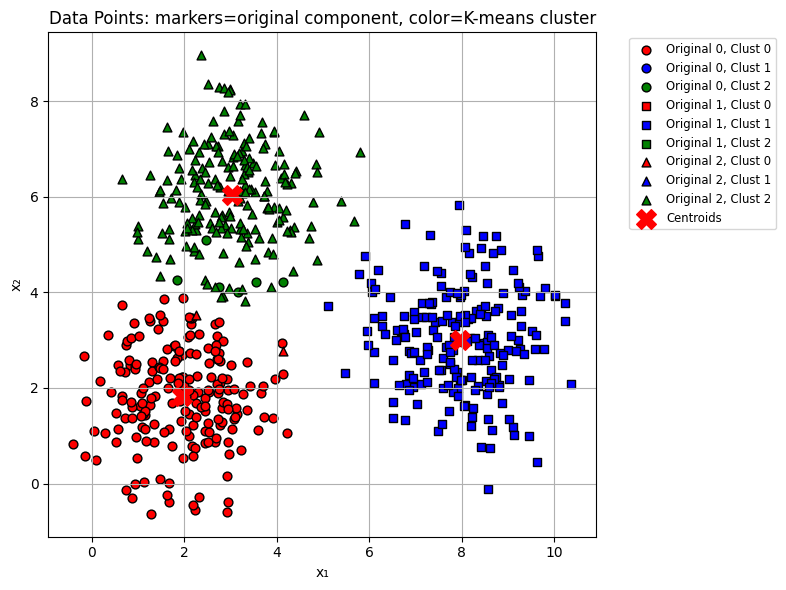

In [60]:
plot_kmeans(X,centroids[-1],labels[-1],original_labels)


Khởi tạo ngẫu nhiên các tâm cụm có thể ảnh hưởng đến hiệu quả phân cụm.Do centroid ban đầu được chọn ngẫu nhiên, K-Means có thể hội tụ về các cụm khác nhau mỗi lần chạy, đặc biệt nếu dữ liệu không được phân chia rõ ràng hoặc có noise

## Assignment 2

In [50]:
cov = [[1,0],[0,1]]
X1 = np.random.multivariate_normal([2,2],cov,50)
X2 = np.random.multivariate_normal([8,3],cov,20)
X3 = np.random.multivariate_normal([3,6],cov,1000)
X = np.concatenate((X1,X2,X3),axis=0)
original_labels = np.array([0]*50 + [1]*20 + [2]*1000)
(centroids,labels,iteration) = kmeans(X,3)
print(f'Centroids found by k-means:\n {centroids[-1]}')

Centroids found by k-means:
 [[3.83794129 6.34867084]
 [3.29013644 3.41963063]
 [2.18067162 6.02593888]]


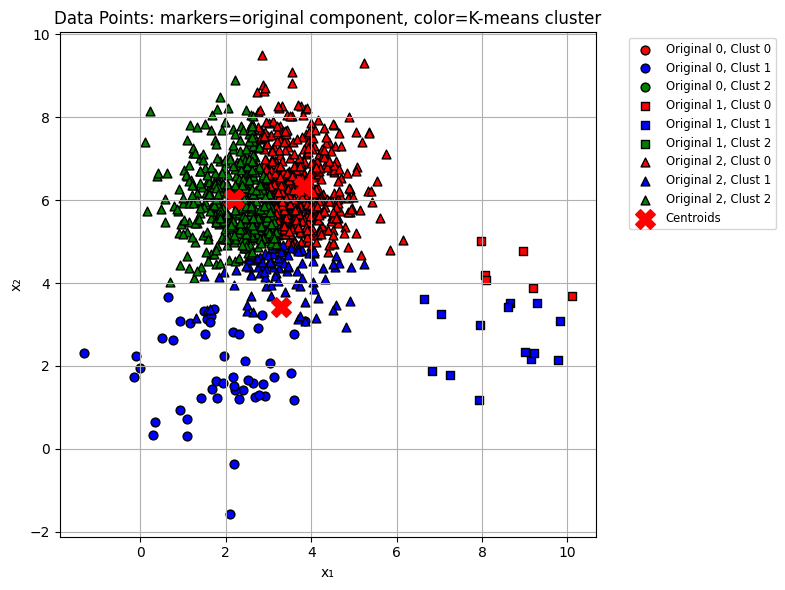

In [51]:
plot_kmeans(X,centroids[-1],labels[-1],original_labels)

K-means hoạt động không tốt khi các cụm có kích thước hoặc mật độ rất khác nhau.Các điểm centroids của các cụm sẽ gần nhau lại, tạo ra vùng phân nhóm không hợp lý

## Assignment 3

In [53]:
cov1 = [[1,0],[0,1]]
cov2 = [[10,0],[0,1]]
X1 = np.random.multivariate_normal([2,2],cov1,200)
X2 = np.random.multivariate_normal([8,3],cov1,200)
X3 = np.random.multivariate_normal([3,6],cov2,200)
X = np.concatenate((X1,X2,X3),axis=0)
original_labels = np.array([0]*200+[1]*200+[2]*200)
(centroids,labels,iteration) = kmeans(X,3)
print(f'Centroids found by k-means:\n {centroids[-1]}')

Centroids found by k-means:
 [[2.01440264 1.95310975]
 [7.76951802 3.40842897]
 [1.5948024  5.98374716]]


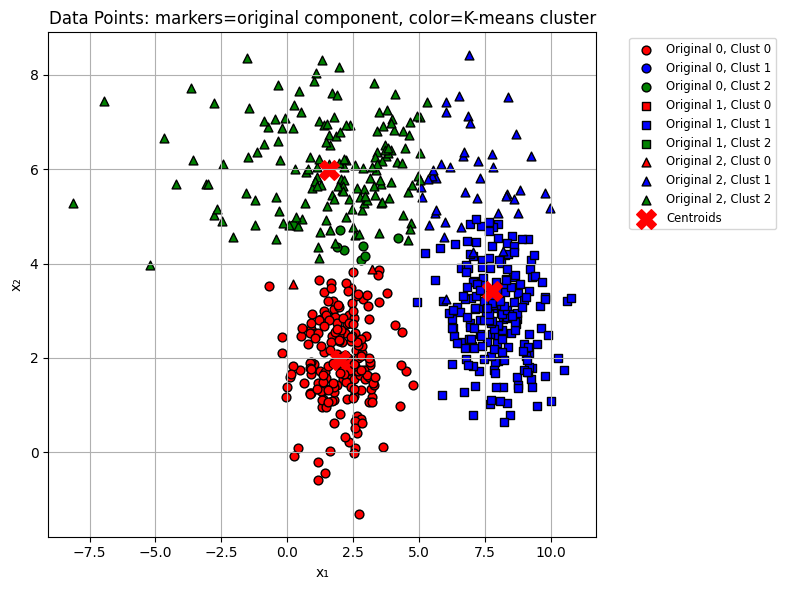

In [54]:
plot_kmeans(X,centroids[-1],labels[-1],original_labels)

Với $\mathcal{N}((3, 6), \Sigma_2)$ phân phối này có độ phương sai lớn ở trục X1 tạo ra một nhóm dữ liệu kéo dài theo chiều ngang.Điều này khiến dữ liệu của nó có thể lấn sang ranh giới cụm khác khiến việc phân cụm bị nhiễu